# Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experiencenya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

# Tugas dan Langkah
Pada tugas kali ini, saya akan melakukan analisis dengan menggunakan Data bulan Juni 2020. Langkah yang akan dilakukan adalah sebagai berikut.

1. Mencari ID pelanggan (Nomor telepon) yang valid.
2. Mengatasi data-data yang masih kosong (Missing Values).
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variabel.
4. Menstandarisasi Nilai dari Variabel.
5. Melakukan Exploratory Data Analysis.
6. Melakukan Data Pre-Processing.
7. Melakukan Pemodelan Machine Learning.
8. Menentukan Model Terbaik.

# Library yang digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu dalam melakukan analisis data sebagai berikut.

###### Pandas

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

- read_csv() digunakan untuk membaca file csv
- str.match() digunakan untuk mencocokan dengan karakter tertentu
- drop() digunakan untuk menghapus
- describe() digunakan untuk melihat deskripsi datanya
- count() digunakan untuk mengitung masing-masing variable
- drop_duplicates() digunakan untuk menghapus data duplicate rows
- fillna() digunakan untuk mengisi dengan nilai tertentu
- quantile() digunakan untuk melihat quantile ke tertentu
- mask() menganti nilai tertentu jika kondisi memenuhi
- astype() merunubah tipe data
- value_counts() digunakan untuk mengitung unik dari kolom
- sort_values() digunakan untuk sort values
- isnull() digunakan untuk mendeteksi missing values
- dropna() digunakan untuk menghapus missing values
- replace() digunakan untuk mengganti nilai

###### Matplotlib

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

- figure() digunakan untuk membuat figure gambar baru
- subplots()digunakan untuk membuat gambar dan satu set subplot
- title()digunakan untuk memberi judul pada gambar
- ylabel()digunakan untuk memberi label sumbu Y pada gambar
- xlabel()digunakan untuk memberi label sumbu Y pada gambar
- pie()digunakan untuk membuat pie chart

###### Seaborn

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

- box_plot() digunakan untuk membuat box plot
- countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
- heatmap() Plot rectangular data as a color-encoded matrix

###### Scikit-learn

Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.

- LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
- train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
- LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
- RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
- confusion_matrix() digunakan untuk membuat confusion matrix
- classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model

###### Xgboost
Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)

- XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier

# Data yang Digunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv dan dapat baca melalui fungsi pandas di python df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

Untuk detail datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

Note : Pengerjaan berorientasi pada DQLab namun tidak 100% sama sehingga terdapat beberapa nilai berbeda.

# 1. Import Library dan Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

# 2. Memfilter ID Number Pelanggan Format Tertentu

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:
- Panjang karakter adalah 11-12
- Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
- Diawali dengan angka 45 2 digit pertama

Dalam hal ini, akan difilter tanpa mengubah nilai dari customerID. Kemudian dilanjutkan dengan menghapus row yang sama alias terduplikasi.

In [2]:
df_load.iloc[15:28]

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,202006,4.54E+11,Female,0,Yes,Yes,69.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
16,202006,45819132957,Female,0,No,No,52.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
17,202006,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
18,202006,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
19,202006,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No
20,202006,45877978431,Male,1,No,No,1.0,No,No phone service,DSL,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
21,202006,45168014322,Male,0,Yes,No,12.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,202006,45106601971,Male,0,No,No,1.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
23,202006,45363825122,Female,0,Yes,No,58.0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No
24,202006,45632288661,Male,0,Yes,Yes,49.0,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No


In [3]:
df_load.iloc[7056:7071]

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7056,202006,45634041360,Female,0,Yes,Yes,50.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No
7057,202006,45586326,Male,1,No,No,33.0,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30,Yes
7058,202006,4.50E+13,Female,0,No,No,1.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes
7059,202006,459776,Female,0,No,No,22.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.85,450.65,No
7060,202006,4.53E+14,Female,0,No,No,35.0,No,No phone service,DSL,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,33.45,1175.85,No
7061,202006,4.51E+13,Female,0,Yes,Yes,29.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,558.80,No
7062,202006,456726231,Male,1,Yes,No,27.0,Yes,Yes,Fiber optic,...,Yes,No,No,No,One year,Yes,Electronic check,85.90,2220.10,No
7063,202006,45342777AB9,Female,0,Yes,No,19.0,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.10,1620.80,No
7064,202006,457CD958152,Male,1,Yes,No,45.0,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),75.15,3480.35,No
7065,202006,450644FG341,Male,1,No,No,4.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No


Dari data tersebut dapat dilihat bahwa nilai customerID bervariasi seperti 4.53E+14, 459776, dan 450644FG341.
Maka akan difilter sesuai dengan ketentuan diatas.

In [4]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(\d{11,12})')
df_load1 = (df_load[df_load['valid_id'] == True]).drop(['valid_id'], axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load1['customerID'].count())

#Drop duplicates value
df_load1.drop_duplicates()
df_load2 = df_load1.sort_values('customerID', ascending=True).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya adalah',df_load2['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006
Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya adalah 6993


# 3. Mengatasi Missing Values dengan Penghapusan Rows

In [5]:
df_load2.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

Terlihat bahwa pada data diatas terdapat missing value pada kolom tenure, MonthlyCharges, TotalCharges, dan Churn. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan diisi dengan 11
- Variable yang bersifat numerik selain tenure di isi dengan median dari masing-masing variable tersebut

In [6]:
df_load3 = df_load2.dropna(subset=['Churn'])
df_load3_fill_tenure = df_load3['tenure'].fillna(11, inplace = True)
for i in list(df_load3[['MonthlyCharges', 'TotalCharges']]):
    med = df_load3[i].median()
    df_load3_fill = df_load3[i].fillna(med, inplace = True)
df_load3.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Sudah tidak terdapat missing value pada data tersebut.

# 4. Mendeteksi Adanya Outlier (Boxplot)

In [7]:
df_load3.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000,6950.00000,6950.000000
mean,202005.999424,0.162302,32.477266,65.79741,2305.129504
std,0.023985,0.368754,25.188910,50.47553,2578.744667
min,202005.000000,0.000000,0.000000,0.00000,19.000000
25%,202006.000000,0.000000,9.000000,36.46250,406.975000
50%,202006.000000,0.000000,29.000000,70.45000,1400.850000
75%,202006.000000,0.000000,55.000000,89.85000,3799.837500
max,202006.000000,1.000000,500.000000,2311.00000,80000.000000


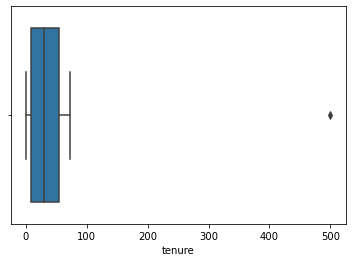

In [8]:
sns.boxplot(x=df_load3["tenure"])

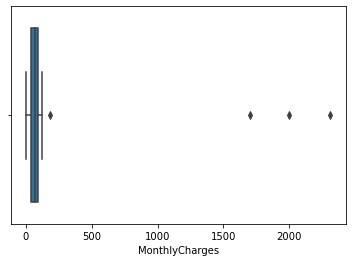

In [9]:
sns.boxplot(x=df_load3["MonthlyCharges"])

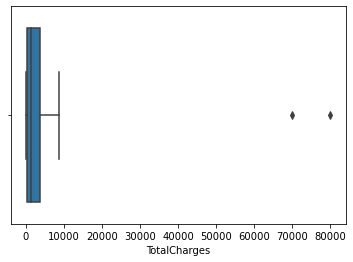

In [10]:
sns.boxplot(x=df_load3["TotalCharges"])

In [11]:
# Outlier tenure
out1_tenure = df_load3["tenure"].quantile(0.25) #q1
out2_tenure = df_load3["tenure"].quantile(0.5) #median
out3_tenure = df_load3["tenure"].quantile(0.75) #q2
out4_tenure = out3_tenure-out1_tenure
# Minor outlier detection
out4a_tenure = out4_tenure*1.5
out5a_tenure,out5b_tenure = out1_tenure+out4a_tenure,out3_tenure+out4a_tenure
# Mayor outlier detection
out4b_tenure = out4_tenure*3
out6a_tenure,out6b_tenure = out1_tenure+out4b_tenure,out3_tenure+out4b_tenure

# Outlier monthly charges
out1_MonthlyCharges = df_load3["MonthlyCharges"].quantile(0.25) #q1
out2_MonthlyCharges = df_load3["MonthlyCharges"].quantile(0.5) #median
out3_MonthlyCharges = df_load3["MonthlyCharges"].quantile(0.75) #q2
out4_MonthlyCharges = out3_MonthlyCharges-out1_MonthlyCharges
# Minor outlier detection
out4a_MonthlyCharges = out4_MonthlyCharges*1.5
out5a_MonthlyCharges,out5b_MonthlyCharges = out1_MonthlyCharges+out4a_MonthlyCharges,out3_MonthlyCharges+out4a_MonthlyCharges
# Mayor outlier detection
out4b_MonthlyCharges = out4_MonthlyCharges*3
out6a_MonthlyCharges,out6b_MonthlyCharges = out1_MonthlyCharges+out4b_MonthlyCharges,out3_MonthlyCharges+out4b_MonthlyCharges

# Outlier total charges
out1_TotalCharges = df_load3["TotalCharges"].quantile(0.25) #q1
out2_TotalCharges = df_load3["TotalCharges"].quantile(0.5) #median
out3_TotalCharges = df_load3["TotalCharges"].quantile(0.75) #q2
out4_TotalCharges = out3_TotalCharges-out1_TotalCharges
# Minor outlier detection
out4a_TotalCharges = out4_TotalCharges*1.5
out5a_TotalCharges,out5b_TotalCharges = out1_TotalCharges+out4a_TotalCharges,out3_TotalCharges+out4a_TotalCharges
# Mayor outlier detection
out4b_TotalCharges = out4_TotalCharges*3
out6a_TotalCharges,out6b_TotalCharges = out1_TotalCharges+out4b_TotalCharges,out3_TotalCharges+out4b_TotalCharges

#Numbers outlier
u1 = df_load3[df_load3["tenure"] >= out5b_tenure].shape[0]
u2 = df_load3[df_load3["MonthlyCharges"] >= out5b_MonthlyCharges].shape[0]
u3 = df_load3[df_load3["TotalCharges"] >= out5b_TotalCharges].shape[0]
print("Jumlah outlier pada kolom tenure sebanyak {}, MonthlyCharges sebanyak {}, dan TotalCharges sebanyak {}".format(u1,u2,u3))

Jumlah outlier pada kolom tenure sebanyak 1, MonthlyCharges sebanyak 4, dan TotalCharges sebanyak 2


# 5. Mengatasi Outlier
Dalam mengatasi outlier, akan diubah di luar range minimum dan maksimum ke dalam nilai minimum dan maksimum yang ditolerir yaitu batas minimum dan maksimum dari boxplot.

In [12]:
tenure = df_load3["tenure"].mask(df_load3["tenure"] > out5b_tenure, out5b_tenure)
MonthlyCharges = df_load3["MonthlyCharges"].mask(df_load3["MonthlyCharges"] > out5b_MonthlyCharges, out5b_MonthlyCharges)
TotalCharges = df_load3["TotalCharges"].mask(df_load3["TotalCharges"] > out5b_TotalCharges, out5b_TotalCharges)

data_man = pd.DataFrame({"tenure":tenure,"MonthlyCharges":MonthlyCharges,"TotalCharges":TotalCharges})
df_load3a = df_load3.drop(columns ={"tenure","MonthlyCharges","TotalCharges"})
df_load4 = df_load3a.join(data_man)
df_load4[["tenure","MonthlyCharges","TotalCharges"]].describe(), df_load4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 2307 to 1634
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   object 
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   int64  
 4   Partner           6950 non-null   object 
 5   Dependents        6950 non-null   object 
 6   PhoneService      6950 non-null   object 
 7   MultipleLines     6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   OnlineSecurity    6950 non-null   object 
 10  OnlineBackup      6950 non-null   object 
 11  DeviceProtection  6950 non-null   object 
 12  TechSupport       6950 non-null   object 
 13  StreamingTV       6950 non-null   object 
 14  StreamingMovies   6950 non-null   object 
 15  Contract          6950 non-null   object 
 16  PaperlessBilling  6950 non-null   objec

(            tenure  MonthlyCharges  TotalCharges
 count  6950.000000     6950.000000   6950.000000
 mean     32.423165       65.004414   2286.104793
 std      24.581073       30.056732   2265.809381
 min       0.000000        0.000000     19.000000
 25%       9.000000       36.462500    406.975000
 50%      29.000000       70.450000   1400.850000
 75%      55.000000       89.850000   3799.837500
 max     124.000000      169.931250   8889.131250,
 None)

Sudah tidak terdapat outlier pada kolom tenure, MonthlyCharges, dan TotalCharges.

# 6. Mendeteksi Nilai yang tidak Standar

In [13]:
for ii in list(df_load4.columns):
    a = df_load4[ii].value_counts()
    print(a)

202006    6946
202005       4
Name: UpdatedAt, dtype: int64
45786827951    1
45267250756    1
45910140936    1
45614732381    1
45994415323    1
              ..
45546171404    1
45262164426    1
45751724369    1
45652248234    1
45529669412    1
Name: customerID, Length: 6950, dtype: int64
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64
Yes    6281
No      669
Name: PhoneService, dtype: int64
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64
No                     3454
Yes                    1991
No internet service    1505
Name: OnlineSecurity, dtype: int64
No                     3045
Yes                    2400

Berdasarkan informasi diatas, terlihat bahwa terdapat nilai yang tidak standar yaitu pada kolom gender, Partner dan Churn. Akan diganti nilai yang tidak standar tersebut dengan kriteria sebagai berikut.

- Wanita -> Female
- Laki-Laki -> Male
- Iya -> Yes
- Churn -> Yes

In [14]:
df_load5 = df_load4.replace(["Churn", "Laki-Laki", "Wanita" ,"Iya"],["Yes", "Male", "Female", "Yes"])
for j in list(df_load5.columns):
    a = df_load5[j].value_counts()
    print(a)

202006    6946
202005       4
Name: UpdatedAt, dtype: int64
45786827951    1
45267250756    1
45910140936    1
45614732381    1
45994415323    1
              ..
45546171404    1
45262164426    1
45751724369    1
45652248234    1
45529669412    1
Name: customerID, Length: 6950, dtype: int64
Male      3505
Female    3445
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
No     4870
Yes    2080
Name: Dependents, dtype: int64
Yes    6281
No      669
Name: PhoneService, dtype: int64
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64
No                     3454
Yes                    1991
No internet service    1505
Name: OnlineSecurity, dtype: int64
No                     3045
Yes                    2400
No internet service    1505
Name: OnlineBackup, dtype

Sudah tidak ada nilai yang tidak standar.

# 7. Exploratory Data Analysis
Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

- Univariat Analysis — analisis deskriptif dengan satu variabel
- Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel
- Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel

Dalam kasus ini, Data Scientist diminta untuk melihat persebaran dari:

- Prosentase persebaran data Churn dan tidaknya dari seluruh data
- Persebarang data dari variable predictor terhadap label (Churn)

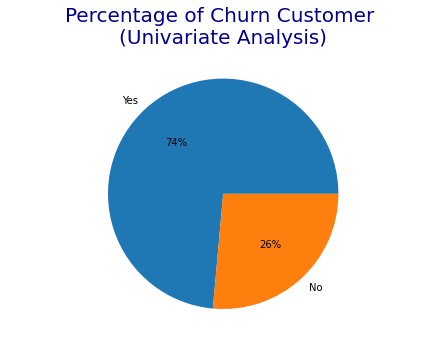

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load5.Churn.value_counts()
ax.pie(churn, labels = labels,autopct='%.0f%%')
plt.title("Percentage of Churn Customer \n(Univariate Analysis)", fontsize = 20, color = "darkblue")
plt.show()

Terlihat bahwa persentase customer tidak melakukan Churn sebanyak 26% dan No Churn sebanyak 74%. Hal yang akan dilakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan kategorik serta membuat plot secara bivariat, kemudian menginterpretasikannya.

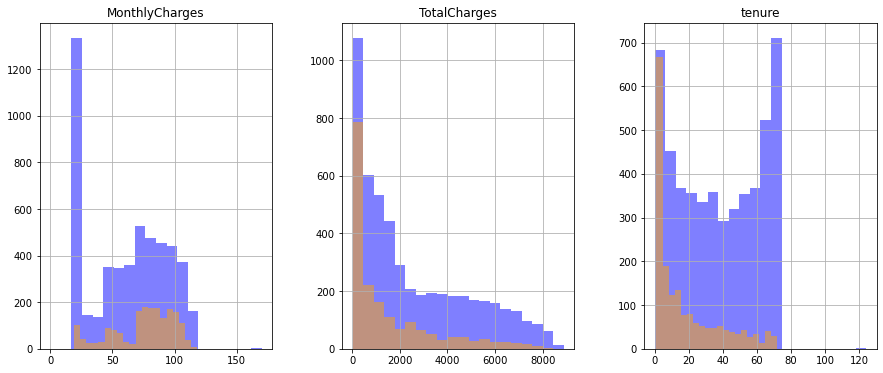

In [16]:
# Numerical Variable Analysis
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
df_load5[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load5[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Dapat diketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.

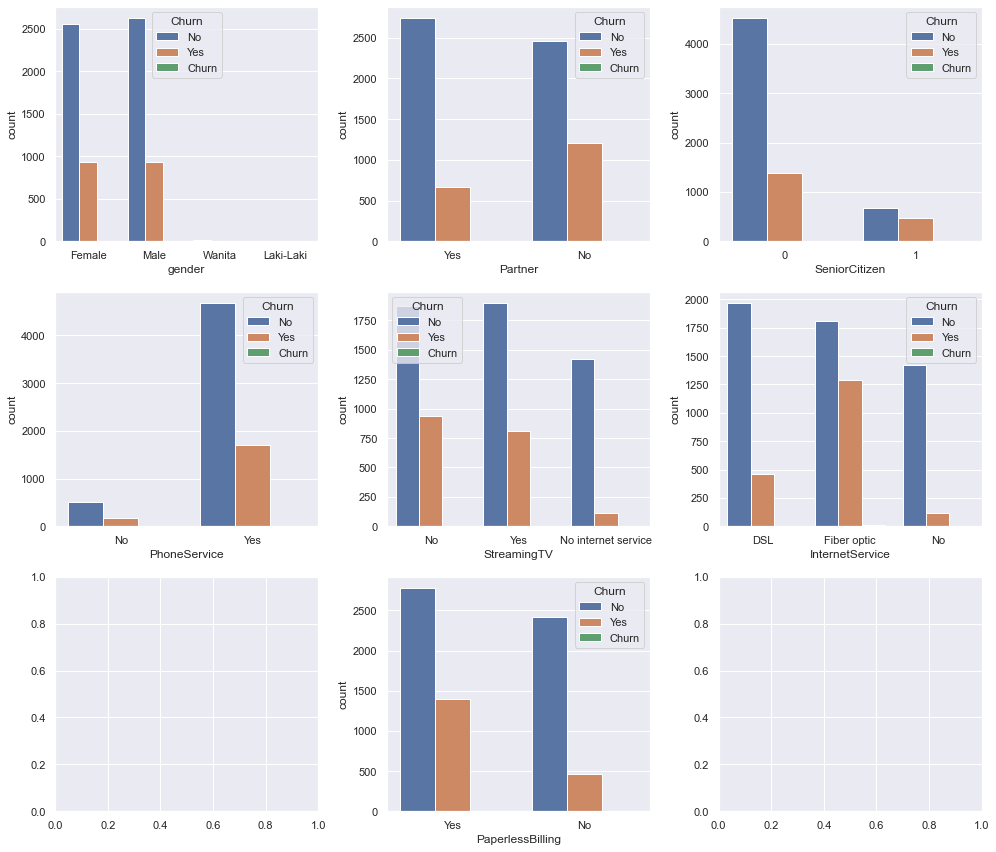

In [17]:
# Categorical Variable Analysis
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x = 'gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x = 'Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x = 'SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x = 'PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x = 'StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x = 'InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x = 'PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Dapat bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan teleponnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# 8. Menghapus Unnecessary Columns dari data

In [18]:
cleaned_df = df_load5.drop(['UpdatedAt', 'customerID', 'Dependents', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingMovies', 'Contract', 'PaymentMethod'], axis = 1)
print("Berikut perbandingan kolom sebelum dan sesudah dihapus \n Sebelum dihapus \n {} \n Sesudah dihapus \n {}"
      .format(df_load5.columns, cleaned_df.columns))

Berikut perbandingan kolom sebelum dan sesudah dihapus 
 Sebelum dihapus 
 Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object') 
 Sesudah dihapus 
 Index(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'InternetService',
       'StreamingTV', 'PaperlessBilling', 'Churn', 'tenure', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


# 9. Encoding Data
Data berikut merupakan data kategorik dengan jenis Supervised Learning. Data dapat diolah dengan beberapa algoritma Supervised Learning diantaranya Logistic Regression, RandomForestClassifier, dan Gradient Boosting Classifier. Data yang diperlukan untuk keperluan modelling akan diencoding dengan melabeli data bertipe kategorik menjadi data bertipe numerik.

In [19]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

,gender,SeniorCitizen,Partner,PhoneService,InternetService,StreamingTV,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,0.903741,0.872950,0.985180,0.591942,0.264317,32.423165,65.004414,2286.104793
std,0.500017,0.368754,0.499757,0.294967,0.737618,0.885069,0.491509,0.441000,24.581073,30.056732,2265.809381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.462500,406.975000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,29.000000,70.450000,1400.850000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,55.000000,89.850000,3799.837500
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,124.000000,169.931250,8889.131250


Data sudah diencoding.

# 10. Splitting Dataset
Data akan dibagi menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y) dan akan menggunakan train_test_split() untuk membagi data tersebut.

In [20]:
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.739157
1    0.260843
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.727578
1    0.272422
Name: Churn, dtype: float64


### A. Logistic Regression

In [21]:
log_model_LR = LogisticRegression().fit(x_train,y_train)
y_train_pred_LR = log_model_LR.predict(x_train)
print("Algoritma Modelling yang digunakan adalah {} ".format(log_model_LR))
print(classification_report(y_train, y_train_pred_LR))

Algoritma Modelling yang digunakan adalah LogisticRegression() 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3596
           1       0.65      0.47      0.54      1269

    accuracy                           0.80      4865
   macro avg       0.74      0.69      0.71      4865
weighted avg       0.78      0.80      0.78      4865



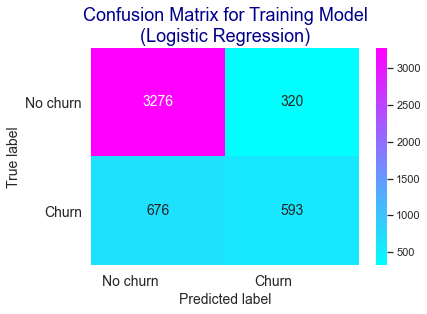

In [22]:
confusion_matrix_df_train_LR = pd.DataFrame((confusion_matrix(y_train, y_train_pred_LR)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_train_LR, annot=True, annot_kws={"size": 14}, fmt="d", cmap="cool")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Jika menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detailnya bisa dilihat di dokumentasinya.

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 593
- Tebakan tidak churn yang sebenernya tidak churn adalah 3276
- Tebakan tidak churn yang sebenernya benar churn adalah 676
- Tebakan churn yang sebenernya tidak churn adalah 320

In [23]:
y_test_pred_LR = log_model_LR.predict(x_test)
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1517
           1       0.68      0.47      0.55       568

    accuracy                           0.80      2085
   macro avg       0.75      0.69      0.71      2085
weighted avg       0.78      0.80      0.78      2085



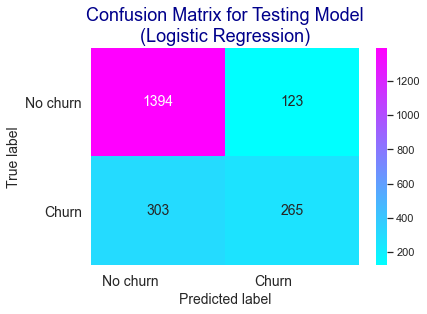

In [24]:
confusion_matrix_df_test_LR = pd.DataFrame((confusion_matrix(y_test, y_test_pred_LR)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_test_LR, annot=True, annot_kws={"size": 14}, fmt="d", cmap="cool")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 265
- Tebakan tidak churn yang sebenernya tidak churn adalah 1394
- Tebakan tidak churn yang sebenernya benar churn adalah 303
- Tebakan churn yang sebenernya tidak churn adalah 123

### B. Random Forest Classifier

In [25]:
Log_Model_RFC = RandomForestClassifier().fit(x_train,y_train)
y_train_pred_RFC = Log_Model_RFC.predict(x_train)
print(classification_report(y_train, y_train_pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3596
           1       0.99      0.99      0.99      1269

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



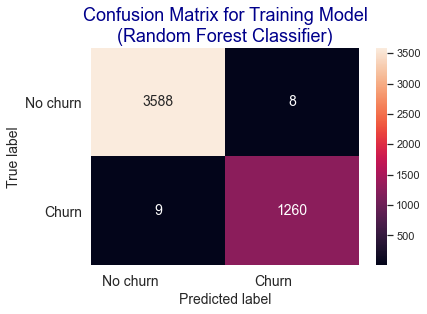

In [26]:
confusion_matrix_df_train_RFC = pd.DataFrame((confusion_matrix(y_train, y_train_pred_RFC)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_train_RFC, annot=True, annot_kws={"size": 14}, fmt="d", cmap="rocket")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Jika menggunakan algoritma  random forest classifier dengan memanggil  RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detailnya bisa dilihat di dokumentasinya.

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 1260
- Tebakan tidak churn yang sebenernya tidak churn adalah 3588
- Tebakan tidak churn yang sebenernya benar churn adalah 9
- Tebakan churn yang sebenernya tidak churn adalah 8

In [27]:
y_test_pred_RFC = Log_Model_RFC.predict(x_test)
print(classification_report(y_test, y_test_pred_RFC))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1517
           1       0.63      0.46      0.54       568

    accuracy                           0.78      2085
   macro avg       0.73      0.68      0.70      2085
weighted avg       0.77      0.78      0.77      2085



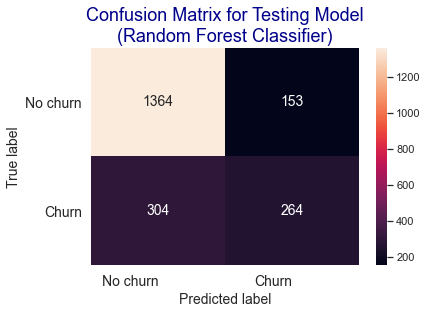

In [28]:
confusion_matrix_df_test_RFC = pd.DataFrame((confusion_matrix(y_test, y_test_pred_RFC)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_test_RFC, annot=True, annot_kws={"size": 14}, fmt="d", cmap="rocket")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Jika menggunakan algoritma  random forest classifier dengan memanggil  RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detailnya bisa dilihat di dokumentasinya.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 77%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 256
- Tebakan tidak churn yang sebenernya tidak churn adalah 1359
- Tebakan tidak churn yang sebenernya benar churn adalah 312
- Tebakan churn yang sebenernya tidak churn adalah 158

### C. Gradient Boosting Classifier

In [29]:
log_model_GBC = GradientBoostingClassifier().fit(x_train,y_train)
y_train_pred_GBC = log_model_GBC.predict(x_train)
print(classification_report(y_train, y_train_pred_GBC))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3596
           1       0.71      0.54      0.61      1269

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



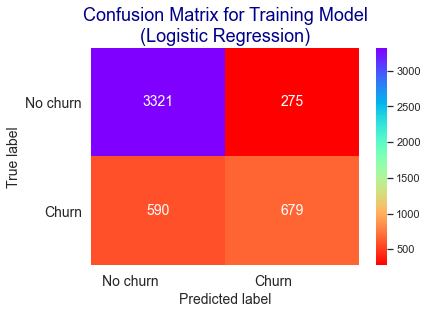

In [30]:
confusion_matrix_df_train_GBC = pd.DataFrame((confusion_matrix(y_train, y_train_pred_GBC)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_train_GBC, annot=True, annot_kws={"size": 14}, fmt="d", cmap="rainbow_r")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Jika menggunakan algoritma Gradient Boosting Classifier dengan memanggil GradientBoostingClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detailnya bisa dilihat di dokumentasinya.

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 679
- Tebakan tidak churn yang sebenernya tidak churn adalah 3321
- Tebakan tidak churn yang sebenernya benar churn adalah 590
- Tebakan churn yang sebenernya tidak churn adalah 275

In [31]:
y_test_pred_GBC = log_model_GBC.predict(x_test)
print(classification_report(y_test, y_test_pred_GBC))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1517
           1       0.67      0.50      0.57       568

    accuracy                           0.79      2085
   macro avg       0.75      0.70      0.72      2085
weighted avg       0.78      0.79      0.78      2085



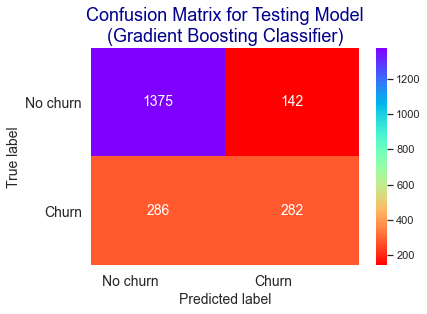

In [32]:
confusion_matrix_df_test_GBC = pd.DataFrame((confusion_matrix(y_test, y_test_pred_GBC)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_test_GBC, annot=True, annot_kws={"size": 14}, fmt="d", cmap="rainbow_r")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Jika menggunakan algoritma Gradient Boosting Classifier dengan memanggil GradientBoostingClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detailnya bisa dilihat di dokumentasinya.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detail : 
- Tebakan churn yang sebenernya benar churn adalah 282
- Tebakan tidak churn yang sebenernya tidak churn adalah 1375
- Tebakan tidak churn yang sebenernya benar churn adalah 286
- Tebakan churn yang sebenernya tidak churn adalah 142

# 11. Menentukan Algoritma Model Terbaik
Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

- Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
- Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
- Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. 

Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 80%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan dasar untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.